In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
def class_name(pred):
  if pred<0.5:
    return "gato"
  else:
    return "cachorro"
    
  

In [3]:
# para ler a rede Cats&Dogs de volta

from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('dogscats_v4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("dogscats_v4.h5")
print("Loaded model from disk")

model=loaded_model

# a partir daqui é só comandar model.compile e model.fit




Loaded model from disk


In [4]:
size = 96

# Define the function to preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert image to grayscale
    image = image.resize((size, size))  
    image = np.array(image)
    image = image.astype('float32')
    image /= 255.0
    image = (image - 0.5) * 2.0  # Apply contrast enhancement
    return image

1/1 [==============================] - 0s 16ms/step


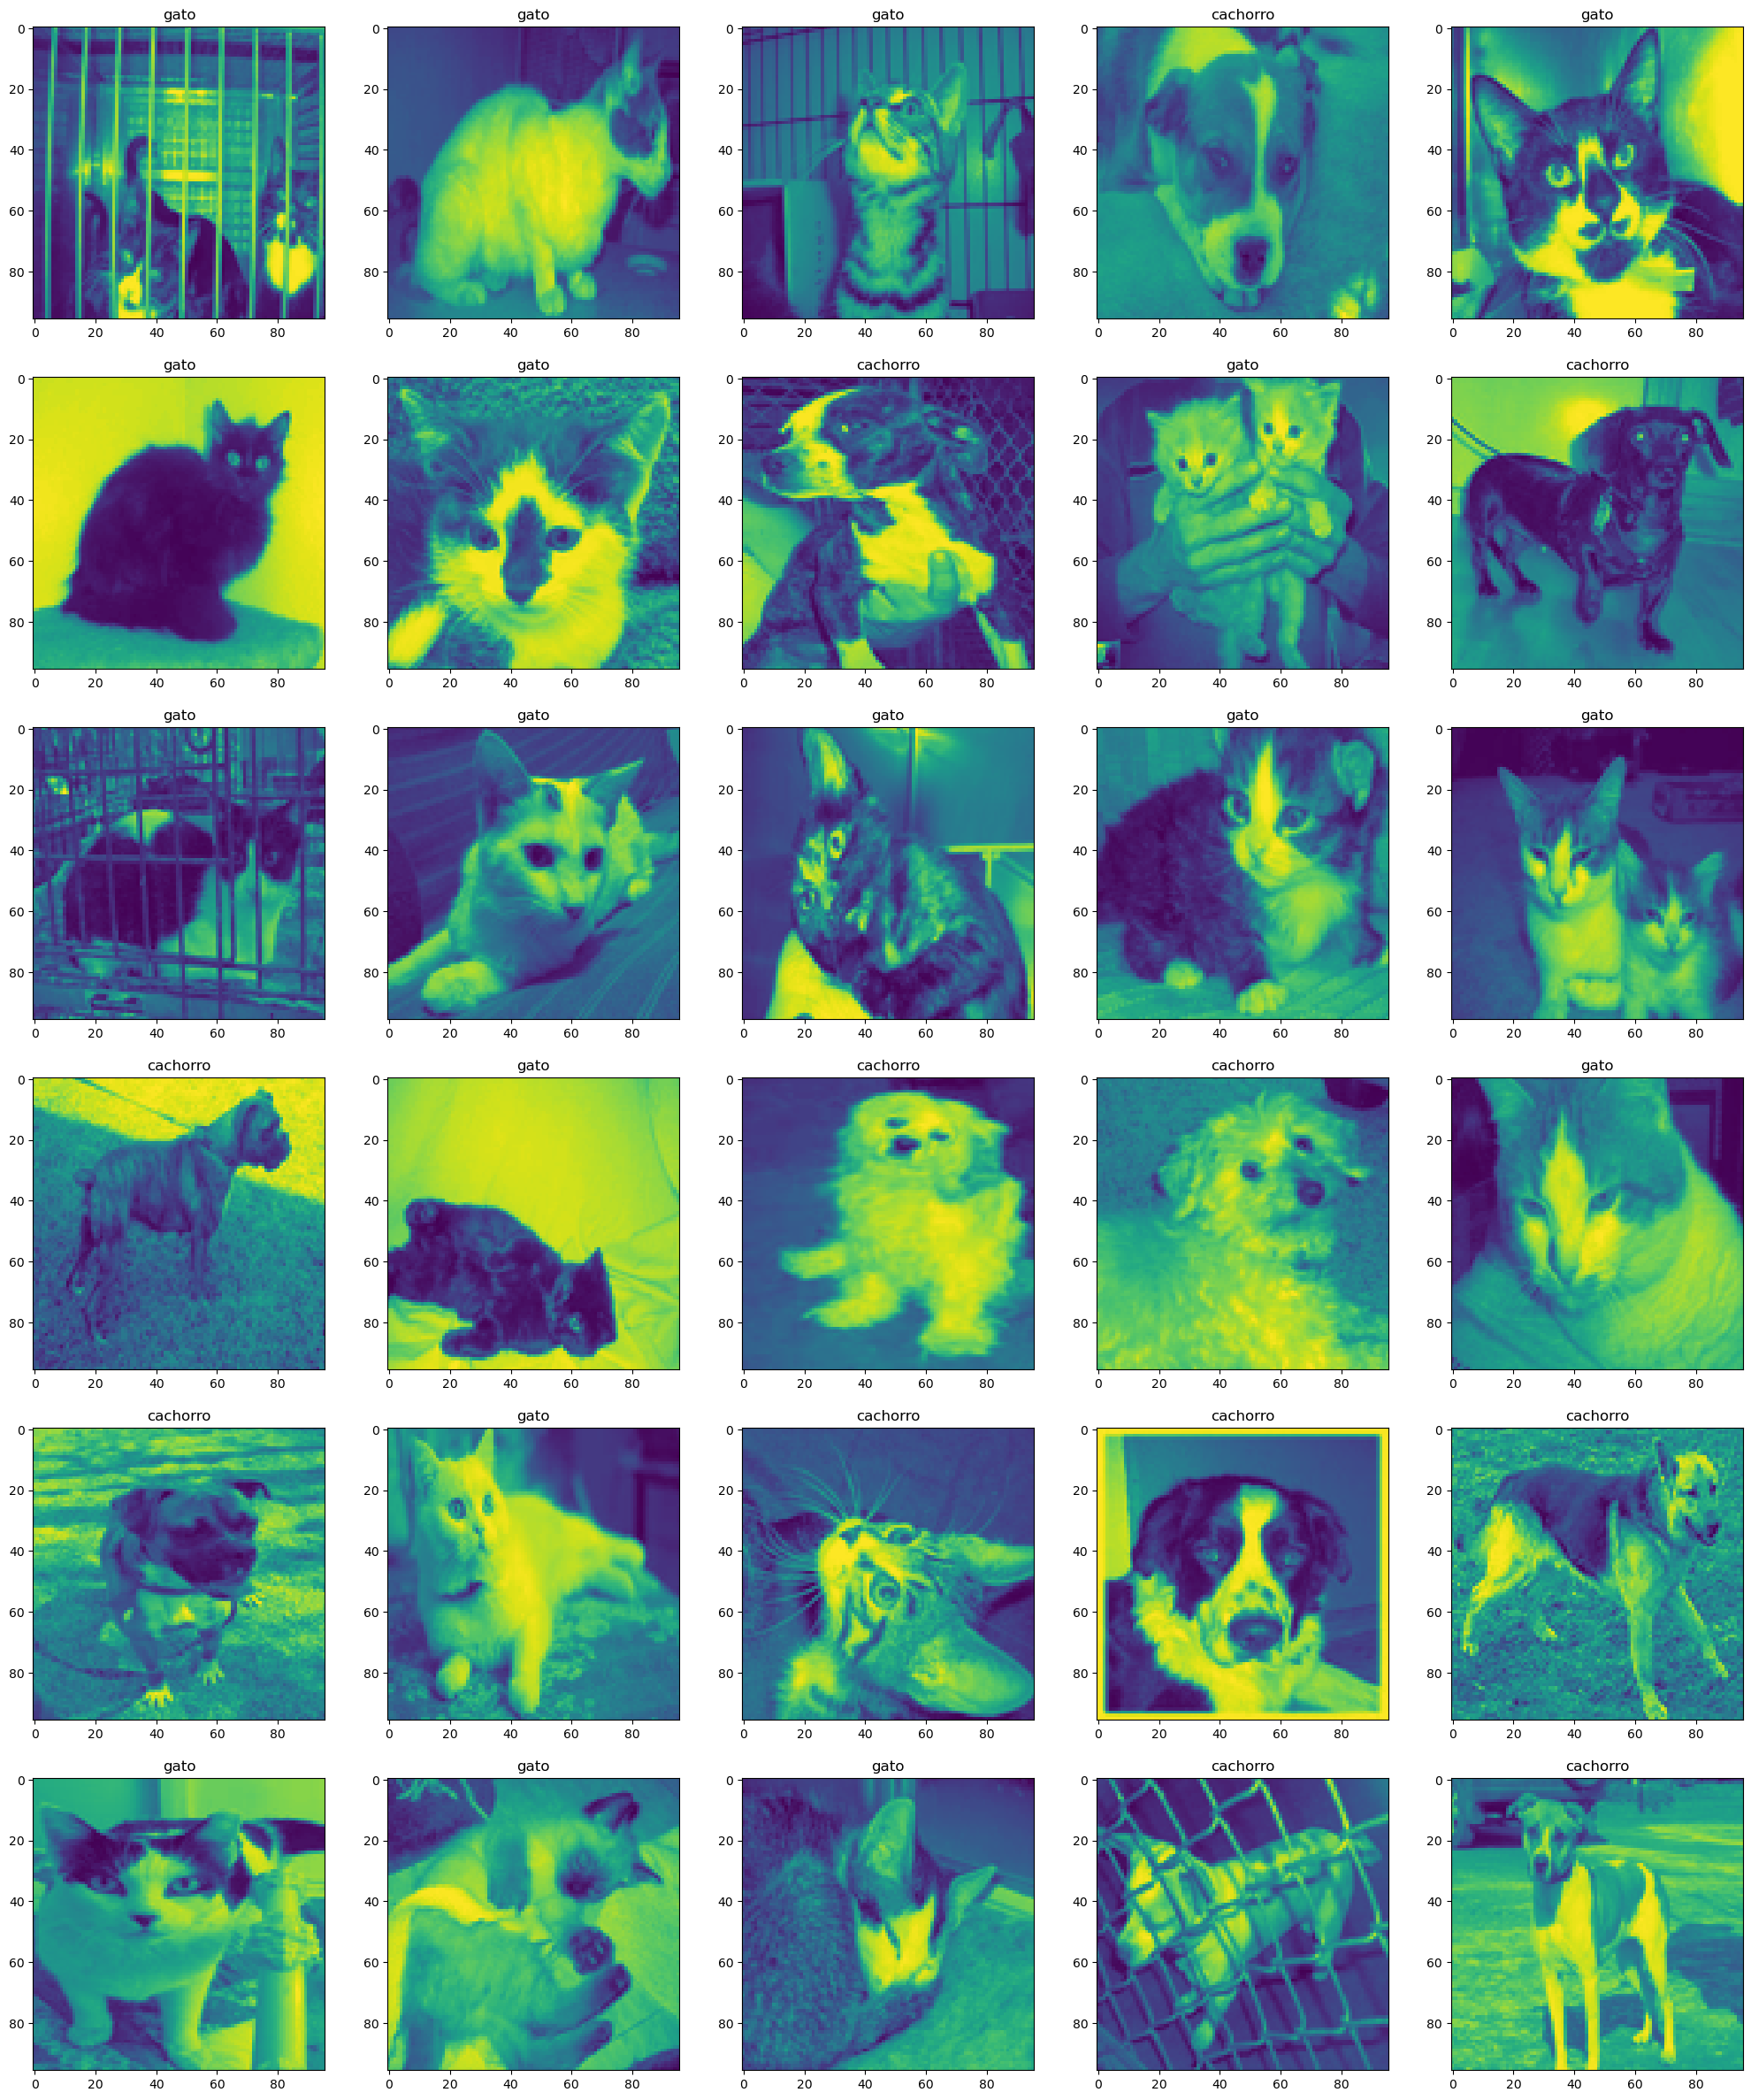

In [7]:
# verificando com dados de teste
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=[25,30])

for i in range (0,30):
    n = np.random.randint(1, 12500)
    arquivo = 'Base de dados/test/'+str(n)+'.jpg'
    
    X_test = preprocess_image(arquivo)
    x_test=X_test

    # processamento com a rede Cats & Dogs
    pred = model.predict(tf.expand_dims(X_test, 0))
    plt.subplot(6,5,i+1)
    plt.imshow(X_test)
    
    plt.title(class_name(pred))
    
plt.show()


In [19]:
# acertou 29 de 30

yoda.jpg
1/1 [==============================] - 0s 65ms/step
[[0.9999603]]
cachorro


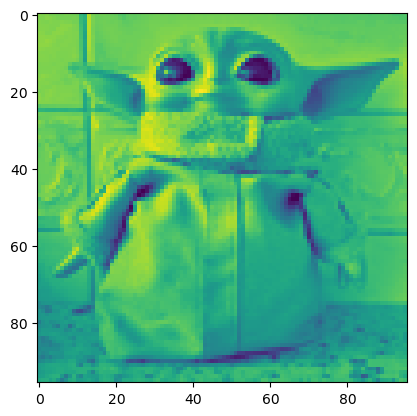

In [11]:
# just for fun

arquivo = 'yoda.jpg'
print(arquivo)
image = preprocess_image(arquivo)
image = image.reshape(size,size,1)
pred = model.predict(tf.expand_dims(image, 0))
plt.imshow(image)
print(pred)
print(class_name(pred))